In [3]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from fbprophet import Prophet
from datetime import datetime

In [4]:
path = "c:/Windows/Fonts/malgun.ttf"
import platform
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')    

plt.rcParams['axes.unicode_minus'] = False

In [7]:
pinkwink_web = pd.read_csv("C:/Users/USER/Desktop/2016726091/DataScience/day7/08. PinkWink Web Traffic.csv", 
                                          encoding='utf-8', thousands=',',
                                          names = ['date','hit'], index_col=0)
pinkwink_web = pinkwink_web[pinkwink_web['hit'].notnull()]
pinkwink_web.head()

,hit
date,
16. 7. 1.,766.0
16. 7. 2.,377.0
16. 7. 3.,427.0
16. 7. 4.,902.0
16. 7. 5.,850.0


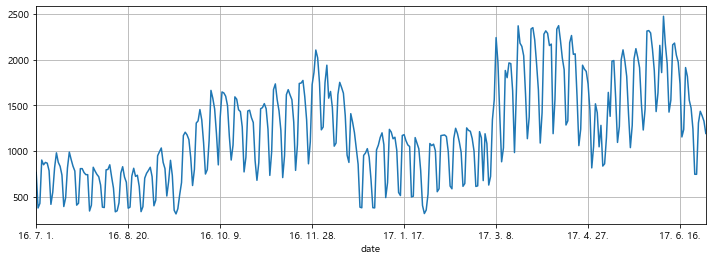

In [8]:
pinkwink_web['hit'].plot(figsize=(12,4), grid=True);

In [9]:
time = np.arange(0,len(pinkwink_web))
traffic = pinkwink_web['hit'].values

fx = np.linspace(0, time[-1], 1000)

In [10]:
def error(f, x, y):
    return np.sqrt(np.mean((f(x)-y)**2))

In [11]:
fp1 = np.polyfit(time, traffic, 1)
f1 = np.poly1d(fp1)

f2p = np.polyfit(time, traffic, 2)
f2 = np.poly1d(f2p)

f3p = np.polyfit(time, traffic, 3)
f3 = np.poly1d(f3p)

f15p = np.polyfit(time, traffic, 15)
f15 = np.poly1d(f15p)

print(error(f1, time, traffic))
print(error(f2, time, traffic))
print(error(f3, time, traffic))
print(error(f15, time, traffic))

430.85973081109626
430.62841018946943
429.5328046676293
330.4777304274343


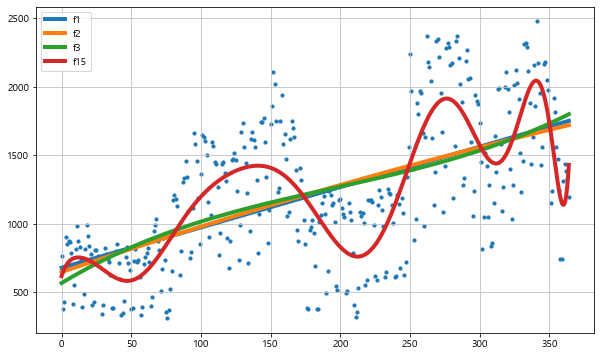

In [19]:
plt.figure(figsize=(10,6))
plt.scatter(time, traffic, s=10)

plt.plot(fx, f1(fx), lw=4, label='f1')
plt.plot(fx, f2(fx), lw=4, label='f2')
plt.plot(fx, f3(fx), lw=4, label='f3')
plt.plot(fx, f15(fx), lw=4, label='f15')

plt.grid(True, linestyle='-', color='0.75')

plt.legend(loc=2)
plt.show()

In [20]:
df = pd.DataFrame({'ds':pinkwink_web.index, 'y':pinkwink_web['hit']})
df.reset_index(inplace=True)
df['ds'] =  pd.to_datetime(df['ds'], format="%y. %m. %d.")
del df['date']

m = Prophet(yearly_seasonality=True, daily_seasonality=True)
m.fit(df);

In [21]:
future = m.make_future_dataframe(periods=60)
future.tail()

,ds
420,2017-08-25
421,2017-08-26
422,2017-08-27
423,2017-08-28
424,2017-08-29


In [22]:
future = m.make_future_dataframe(periods=60)
future.head()

,ds
0,2016-07-01
1,2016-07-02
2,2016-07-03
3,2016-07-04
4,2016-07-05


In [23]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
420,2017-08-25,911.790860,698.394866,1120.098765
421,2017-08-26,496.917939,287.395814,698.502090
422,2017-08-27,629.458439,416.421397,842.432243
423,2017-08-28,1181.938386,960.214944,1393.989780
424,2017-08-29,1217.864960,1003.528399,1415.982869


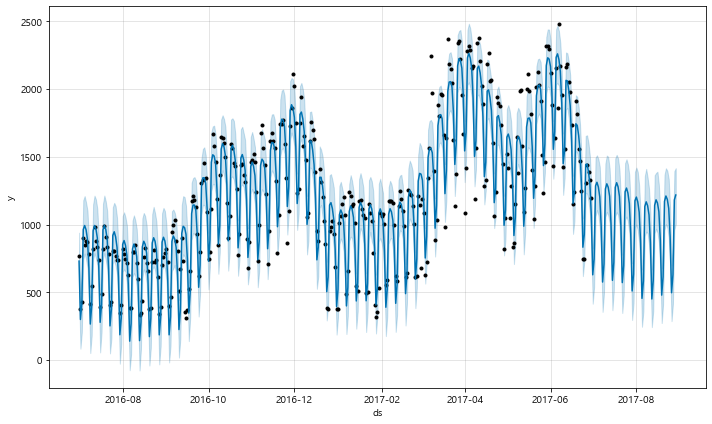

In [24]:
m.plot(forecast);

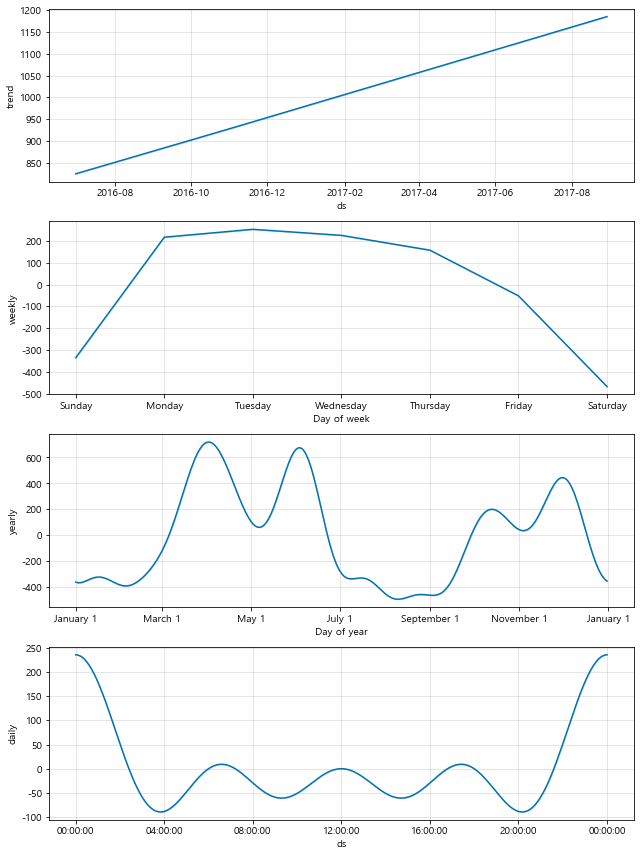

In [25]:
m.plot_components(forecast);

In [27]:
start_date = '1990-1-1' 
end_date = '2017-6-30' 
KIA = data.get_data_yahoo('000270.KS', start_date, end_date)

KIA.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-06-18,80500,79300,79400,80000,1758207,80000
2012-06-19,80400,79500,80000,80000,1075002,80000
2012-06-20,81000,79600,80900,80000,885863,80000
2012-06-21,80300,78700,79700,78800,787586,78800
2012-06-22,78200,77200,77900,77500,1091383,77500


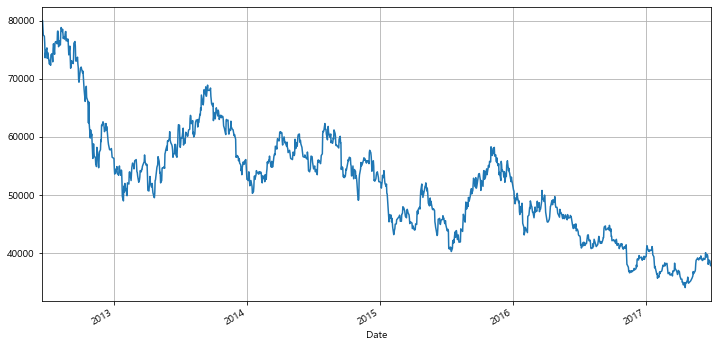

In [28]:
KIA['Close'].plot(figsize=(12,6), grid=True)

In [31]:
KIA_trunc = KIA[:'2016-12-31']
KIA_trunc

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-06-18,80500,79300,79400,80000,1758207,80000
2012-06-19,80400,79500,80000,80000,1075002,80000
2012-06-20,81000,79600,80900,80000,885863,80000
2012-06-21,80300,78700,79700,78800,787586,78800
2012-06-22,78200,77200,77900,77500,1091383,77500
...,...,...,...,...,...,...
2016-12-23,39350,38650,38700,39100,1070783,39100
2016-12-26,39350,38850,39100,39000,465612,39000
2016-12-27,39700,39050,39050,39500,879686,39500


In [32]:
df = pd.DataFrame({'ds':KIA_trunc.index, 'y':KIA_trunc['Close']})
df.reset_index(inplace=True)
del df['Date']
df.head()

,ds,y
0,2012-06-18,80000
1,2012-06-19,80000
2,2012-06-20,80000
3,2012-06-21,78800
4,2012-06-22,77500


In [33]:
m = Prophet(daily_seasonality=True)
m.fit(df);

In [36]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
1482,2017-12-25
1483,2017-12-26
1484,2017-12-27
1485,2017-12-28
1486,2017-12-29


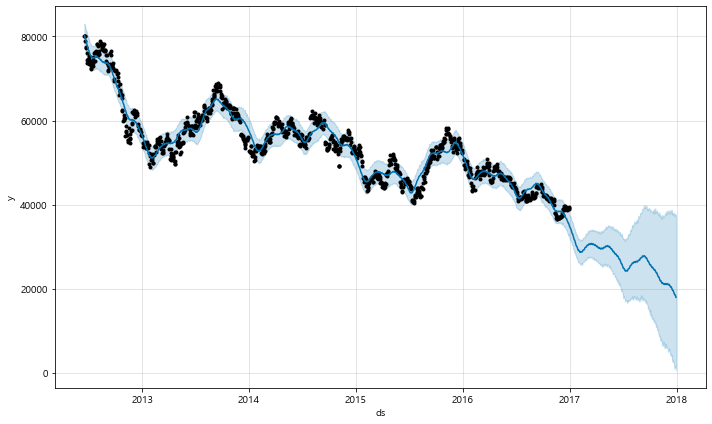

In [38]:
forecast = m.predict(future)
m.plot(forecast);

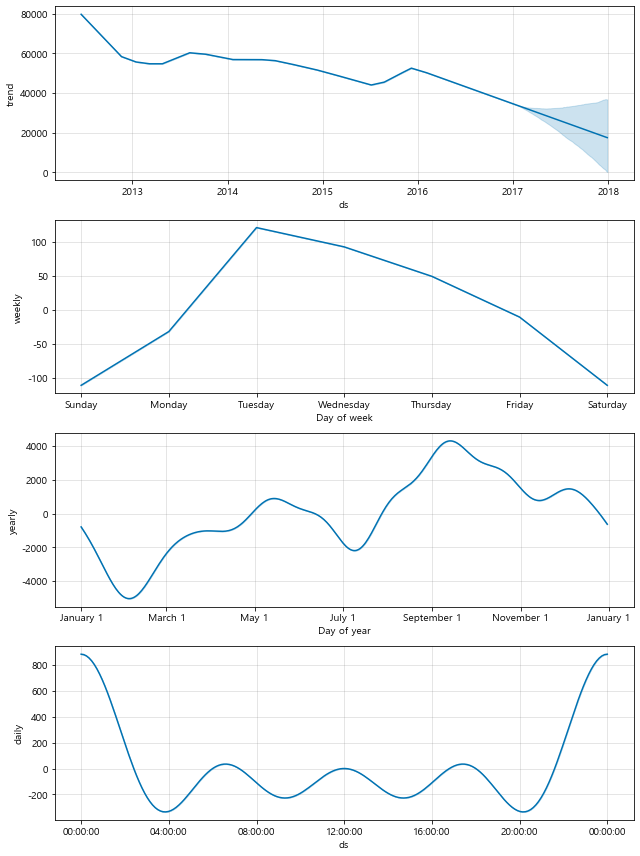

In [39]:
m.plot_components(forecast);

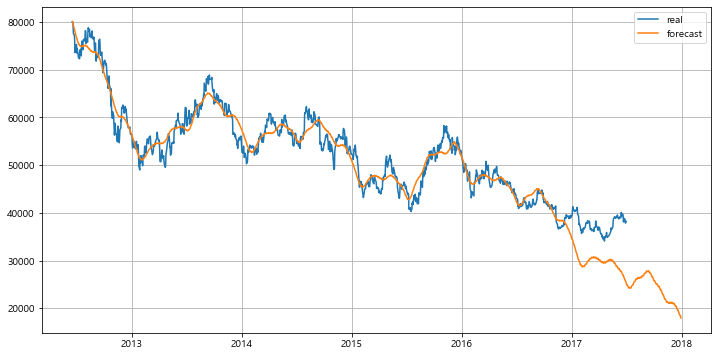

In [43]:
plt.figure(figsize=(12,6))
plt.plot(KIA.index, KIA['Close'], label='real')
plt.plot(forecast['ds'], forecast['yhat'], label='forecast')
plt.grid()
plt.legend()
plt.show()

In [44]:
df = pd.read_csv("C:/Users/USER/Desktop/2016726091/DataScience/day7/08. example_wp_R.csv")
df['y'] = np.log(df['y'])

In [45]:
df['cap'] = 8.5

In [46]:
m = Prophet(growth='logistic', daily_seasonality=True)
m.fit(df)

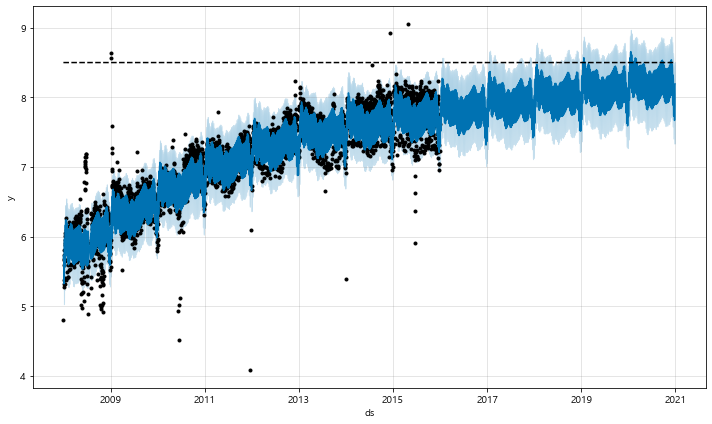

In [47]:
future = m.make_future_dataframe(periods=1826)
future['cap'] = 8.5
fcst = m.predict(future)
m.plot(fcst);

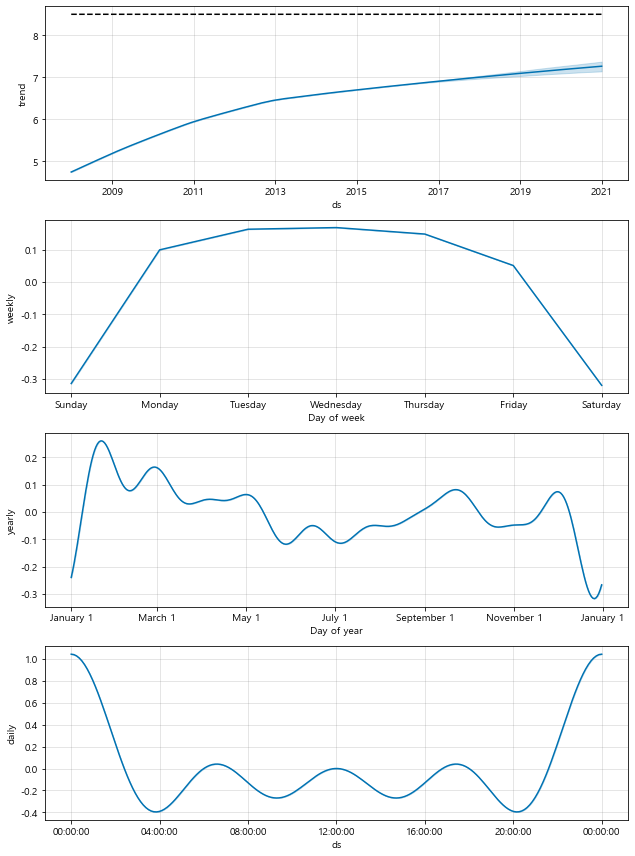

In [48]:
forecast = m.predict(future)
m.plot_components(forecast);